In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Read in songs and genres-artist data.
with open('generated_songs.json') as f:
    tracks = json.load(f)
with open('generated_artists.json') as f:
    artist_objs = json.load(f)
with open('artist_genres.json') as f:
    artists = json.load(f)

In [3]:
artists.keys()

dict_keys(['Clairo', 'Future', 'BANNERS', 'James Arthur', 'ZHU', 'Trisha Yearwood', 'Dixie D’Amelio', 'Khalid', 'ROSIE', 'Jeremy Zucker', 'George Strait', 'GASHI', 'Jaden', 'Alan Jackson', 'Madison Beer', 'Harry Styles', 'NGHTMRE', 'PRETTYMUCH', 'Labrinth', 'Trippie Redd', 'Tate McRae', 'Joe Diffie', 'Cautious Clay', 'Trace Adkins', 'Yo Gotti', 'TroyBoi', 'Hailee Steinfeld', 'Louis Tomlinson', 'Fin Argus', 'Tracy Lawrence', 'Olivia Rodrigo', 'Niall Horan', 'Snakehips', 'Ross Lynch', 'Giveon', 'Troye Sivan', 'FINNEAS', 'Hippie Sabotage', 'Avery Lynch', 'Taylor Swift', 'Octavian', 'Louis The Child', 'Big Wild', 'Hannah Montana', 'Halsey', 'Rodney Atkins', 'Sabrina Carpenter', 'RL Grime', 'John Michael Montgomery', 'Julie and the Phantoms Cast', 'Keith Urban', 'Chris Cagle', 'Tchami', 'Bea Miller', 'Larray', 'Justin Bieber', 'Birdy', 'Camila Cabello', 'The Vamps', 'Lewis Capaldi', 'Brooks & Dunn', 'Shawn Mendes', 'Little Mix', 'French Montana', 'ZAYN', 'Zedd', 'Naomi Scott', 'Wallows', 'C

In [4]:
# Bin the artists into genres...
# EDA - loop through each artist and count the number of times each genres appears
genre_dist = dict()
for genres_lst in artists.values():
    for genre in genres_lst:
        if genre not in genre_dist.keys():
            genre_dist[genre] = 1
        else:
            genre_dist[genre] += 1

In [5]:
genre_dist = pd.DataFrame(genre_dist.items(), columns=['Genre','Freq'])
genre_dist.set_index('Genre',inplace=True)

In [6]:
genre_dist.sort_values('Freq',inplace=True,ascending=False)

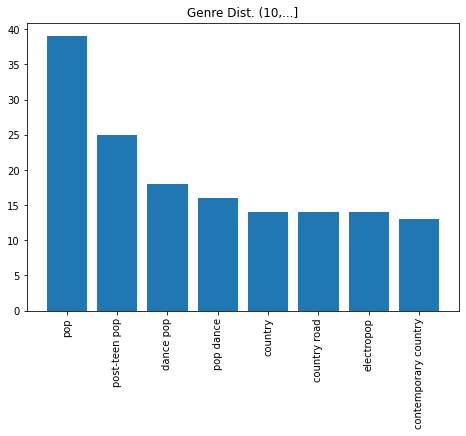

In [7]:
above_10 = genre_dist[genre_dist.Freq > 10]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(above_10.index,above_10['Freq'])
plt.xticks(rotation='vertical')
plt.title("Genre Dist. (10,...]")
plt.show()

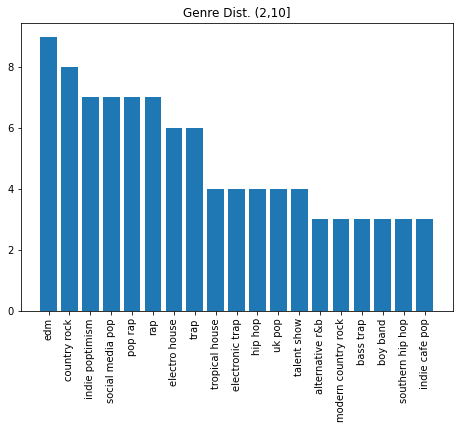

In [8]:
below_10 = genre_dist[genre_dist.Freq <= 10]
above_2_to_10 = below_10[below_10.Freq > 2]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(above_2_to_10.index,above_2_to_10['Freq'])
plt.xticks(rotation='vertical')
plt.title("Genre Dist. (2,10]")
plt.show()

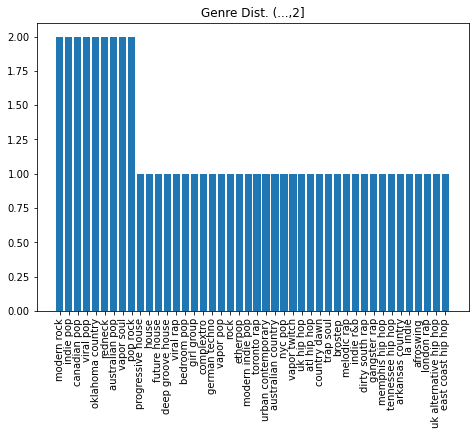

In [9]:
below_2 = genre_dist[genre_dist.Freq <= 2]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(below_2.index,below_2['Freq'])
plt.xticks(rotation='vertical')
plt.title("Genre Dist. (...,2]")
plt.show()

Most of these smaller genres (depicted in Genre Dist. (...,2]) can be classified into bigger "bins" of the genre. For example, "Oklahoma Country" can be put in the broader class of "country". "Australian Alternative pop can definitely be put into a bigger bin such as "Alternative" or "Pop". The rules are as follows...

1. If indie shows up at all in the title of the genre, put that genre in the Indie bin.
2. If house, EDM, or techno shows up in the title, put it in the dance bin.
3. If rap, or trap is in the name, put it in the rap bin.
4. Whats remaining, if it says pop, put it in the pop bin.
5. What's remaining, if it says country, put it in the country bin.
6. Everything else goes into the miscellaneous bin.

In [10]:
# Rule 1
genre_bins = {
    'Indie': [],
    'Dance': [],
    'Rap': [],
    'Pop': [],
    'Country': [],
    'Misc.': []
}
indie_rules = ['indie']
dance_rules = ['dance','house', 'edm', 'techno']
rap_rules = ['rap', 'trap']
pop_rules = ['pop']
country_rules = ['country']
for genre in list(genre_dist.index):
    assigned = False
    # Create and enforce rules for binning indie music
    for rule in indie_rules:
        if rule in genre.split():
            genre_bins['Indie'].append(genre)
            assigned = True
    
    # Create and enfroce for dance
    if not assigned:
        for rule in dance_rules:
            if rule in genre.split():
                genre_bins['Dance'].append(genre)
                assigned = True
    
    # Rap
    if not assigned:
        for rule in rap_rules:
            if rule in genre.split():
                genre_bins['Rap'].append(genre)
                assigned = True
                
    if not assigned:
        for rule in pop_rules:
            if rule in genre.split():
                genre_bins['Pop'].append(genre)
                assigned = True
    
    if not assigned:
        for rule in country_rules:
            if rule in genre.split():
                genre_bins['Country'].append(genre)
                assigned = True
    
    if not assigned:
        genre_bins['Misc.'].append(genre)

In [11]:
genre_bins

{'Indie': ['indie poptimism',
  'indie cafe pop',
  'indie pop',
  'modern indie pop',
  'indie r&b',
  'la indie'],
 'Dance': ['dance pop',
  'pop dance',
  'edm',
  'electro house',
  'tropical house',
  'progressive house',
  'house',
  'future house',
  'deep groove house',
  'german techno'],
 'Rap': ['pop rap',
  'rap',
  'trap',
  'electronic trap',
  'bass trap',
  'viral rap',
  'toronto rap',
  'trap soul',
  'melodic rap',
  'dirty south rap',
  'gangster rap',
  'london rap'],
 'Pop': ['pop',
  'post-teen pop',
  'social media pop',
  'uk pop',
  'canadian pop',
  'viral pop',
  'australian pop',
  'pop rock',
  'bedroom pop',
  'vapor pop',
  'nyc pop'],
 'Country': ['country',
  'country road',
  'contemporary country',
  'country rock',
  'modern country rock',
  'oklahoma country',
  'australian country',
  'country dawn',
  'arkansas country'],
 'Misc.': ['electropop',
  'hip hop',
  'talent show',
  'alternative r&b',
  'boy band',
  'southern hip hop',
  'modern rock

In [12]:
# I have the genres binned accordingly...
# Now, let's create a seperate dict for each overall genre...compile the artist objects into that
# overall dict. Then, perform some manipulations, like average popularity...etc.
indie_artist = []
for artist in artist_objs:
    assigned = False
    for genre in artist['genres']:
        if not assigned:
            if genre in genre_bins['Indie']:
                indie_artist.append(artist)
                assigned = True

followers = np.asarray([])
popularities = np.asarray([])
for artist in indie_artist:
    followers = np.append(followers, artist['followers']['total'])
    popularities = np.append(popularities, artist['popularity'])

indie_stats = {
    "min_followers": min(followers),
    "mean_followers": np.mean(followers),
    "max_followers": max(followers),
    "min_popularity": min(popularities),
    "mean_popularity": np.mean(popularities),
    "max_popularity": max(popularities)
}
indie_stats

{'min_followers': 151429.0,
 'mean_followers': 1943129.6153846155,
 'max_followers': 13853468.0,
 'min_popularity': 65.0,
 'mean_popularity': 75.07692307692308,
 'max_popularity': 90.0}

In [13]:
dance_artist = []
for artist in artist_objs:
    assigned = False
    for genre in artist['genres']:
        if not assigned:
            if genre in genre_bins['Dance']:
                dance_artist.append(artist)
                assigned = True

followers = np.asarray([])
popularities = np.asarray([])
for artist in dance_artist:
    followers = np.append(followers, artist['followers']['total'])
    popularities = np.append(popularities, artist['popularity'])

dance_stats = {
    "min_followers": min(followers),
    "mean_followers": np.mean(followers),
    "max_followers": max(followers),
    "min_popularity": min(popularities),
    "mean_popularity": np.mean(popularities),
    "max_popularity": max(popularities)
}
dance_stats

{'min_followers': 176202.0,
 'mean_followers': 5196460.037037037,
 'max_followers': 36911424.0,
 'min_popularity': 66.0,
 'mean_popularity': 77.29629629629629,
 'max_popularity': 98.0}

In [14]:
rap_artist = []
for artist in artist_objs:
    assigned = False
    for genre in artist['genres']:
        if not assigned:
            if genre in genre_bins['Rap']:
                rap_artist.append(artist)
                assigned = True

followers = np.asarray([])
popularities = np.asarray([])
for artist in rap_artist:
    followers = np.append(followers, artist['followers']['total'])
    popularities = np.append(popularities, artist['popularity'])

rap_stats = {
    "min_followers": min(followers),
    "mean_followers": np.mean(followers),
    "max_followers": max(followers),
    "min_popularity": min(popularities),
    "mean_popularity": np.mean(popularities),
    "max_popularity": max(popularities)
}
rap_stats

{'min_followers': 178658.0,
 'mean_followers': 2674490.533333333,
 'max_followers': 9862643.0,
 'min_popularity': 59.0,
 'mean_popularity': 76.13333333333334,
 'max_popularity': 91.0}

In [15]:
pop_artist = []
for artist in artist_objs:
    assigned = False
    for genre in artist['genres']:
        if not assigned:
            if genre in genre_bins['Pop']:
                pop_artist.append(artist)
                assigned = True

followers = np.asarray([])
popularities = np.asarray([])
for artist in pop_artist:
    followers = np.append(followers, artist['followers']['total'])
    popularities = np.append(popularities, artist['popularity'])

pop_stats = {
    "min_followers": min(followers),
    "mean_followers": np.mean(followers),
    "max_followers": max(followers),
    "min_popularity": min(popularities),
    "mean_popularity": np.mean(popularities),
    "max_popularity": max(popularities)
}
pop_stats

{'min_followers': 151429.0,
 'mean_followers': 6603043.444444444,
 'max_followers': 42378287.0,
 'min_popularity': 59.0,
 'mean_popularity': 79.75555555555556,
 'max_popularity': 98.0}

In [16]:
country_artist = []
for artist in artist_objs:
    assigned = False
    for genre in artist['genres']:
        if not assigned:
            if genre in genre_bins['Country']:
                country_artist.append(artist)
                assigned = True

followers = np.asarray([])
popularities = np.asarray([])
for artist in country_artist:
    followers = np.append(followers, artist['followers']['total'])
    popularities = np.append(popularities, artist['popularity'])

country_stats = {
    "min_followers": min(followers),
    "mean_followers": np.mean(followers),
    "max_followers": max(followers),
    "min_popularity": min(popularities),
    "mean_popularity": np.mean(popularities),
    "max_popularity": max(popularities)
}
country_stats

{'min_followers': 477332.0,
 'mean_followers': 1562253.2142857143,
 'max_followers': 4082901.0,
 'min_popularity': 56.0,
 'mean_popularity': 68.28571428571429,
 'max_popularity': 77.0}

In [17]:
misc_artist = []
for artist in artist_objs:
    assigned = False
    for genre in artist['genres']:
        if not assigned:
            if genre in genre_bins['Misc.']:
                misc_artist.append(artist)
                assigned = True

followers = np.asarray([])
popularities = np.asarray([])
for artist in misc_artist:
    followers = np.append(followers, artist['followers']['total'])
    popularities = np.append(popularities, artist['popularity'])

misc_stats = {
    "min_followers": min(followers),
    "mean_followers": np.mean(followers),
    "max_followers": max(followers),
    "min_popularity": min(popularities),
    "mean_popularity": np.mean(popularities),
    "max_popularity": max(popularities)
}
misc_stats

{'min_followers': 151429.0,
 'mean_followers': 4348653.794117647,
 'max_followers': 19997998.0,
 'min_popularity': 62.0,
 'mean_popularity': 78.23529411764706,
 'max_popularity': 92.0}

We now have stats for each type of genre we are using in the LP. Now, condense and convert into a pandas dataframe, export to CSV, and we are ready to import the parameters into our model.

In [18]:
df = pd.DataFrame.from_dict(indie_stats, orient='index',columns=['Indie'])
df['Dance'] = pd.DataFrame.from_dict(dance_stats, orient='index')
df['Rap'] = pd.DataFrame.from_dict(rap_stats, orient='index')
df['Pop'] = pd.DataFrame.from_dict(pop_stats, orient='index')
df['Country'] = pd.DataFrame.from_dict(country_stats, orient='index')
df['Misc'] = pd.DataFrame.from_dict(misc_stats, orient='index')
df

,Indie,Dance,Rap,Pop,Country,Misc
min_followers,151429.000,176202.000,178658.000,151429.000,477332.000,151429.000
mean_followers,1943129.615,5196460.037,2674490.533,6603043.444,1562253.214,4348653.794
max_followers,13853468.000,36911424.000,9862643.000,42378287.000,4082901.000,19997998.000
min_popularity,65.000,66.000,59.000,59.000,56.000,62.000
mean_popularity,75.077,77.296,76.133,79.756,68.286,78.235
max_popularity,90.000,98.000,91.000,98.000,77.000,92.000


In [24]:
df_t=df.transpose()

In [25]:
df_t

,min_followers,mean_followers,max_followers,min_popularity,mean_popularity,max_popularity
Indie,151429.000,1943129.615,13853468.000,65.000,75.077,90.000
Dance,176202.000,5196460.037,36911424.000,66.000,77.296,98.000
Rap,178658.000,2674490.533,9862643.000,59.000,76.133,91.000
Pop,151429.000,6603043.444,42378287.000,59.000,79.756,98.000
Country,477332.000,1562253.214,4082901.000,56.000,68.286,77.000
Misc,151429.000,4348653.794,19997998.000,62.000,78.235,92.000


In [29]:
df_t['min_followers'].to_csv('indie_followers',header=False)